<a href="https://www.kaggle.com/code/cyrogai/kidney-stone-method-prediction-beginners?scriptVersionId=186379461" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](http://)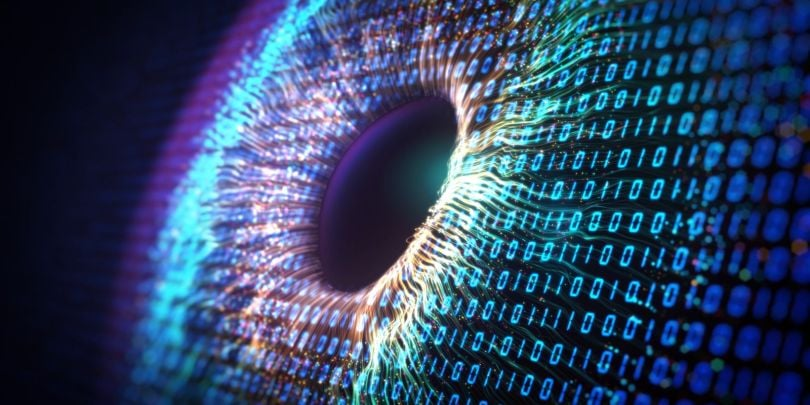

# **Importing libraries**

In [1]:
import numpy as np
import pandas as pd 
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn import linear_model , preprocessing
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# **IMPORTING DATASET**

In [2]:
data = pd.read_csv("/kaggle/input/kidney-stone-data/kidney_stone_data.csv")

In [3]:
data.head()

,treatment,stone_size,success
0,B,large,1
1,A,large,1
2,A,large,0
3,A,large,1
4,A,large,1


In [4]:
data.isnull().sum()

treatment     0
stone_size    0
success       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   treatment   700 non-null    object
 1   stone_size  700 non-null    object
 2   success     700 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 16.5+ KB


# **IMPORTING LABEL ENCODER TO CONVERT STR TO INT**

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['treatment']= le.fit_transform(data['treatment'])
data['stone_size']= le.fit_transform(data['stone_size'])
data['success']= le.fit_transform(data['success'])

In [7]:
data.head()

,treatment,stone_size,success
0,1,0,1
1,0,0,1
2,0,0,0
3,0,0,1
4,0,0,1


# **SPLIT X AND Y**

In [8]:
x = data.drop(["success"], axis = 1)
y = data["success"]

# **SPLITTING DATA INTO TRAIN TEST AND SPLIT**

In [9]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2 , random_state = 42)

# **LinearRegression**

In [10]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

linear.fit(x_train,y_train)
linear = linear.score(x_test,y_test)
print("ACCURACY:", linear)

ACCURACY: 0.01426045508152507


# **KNeighborsClassifier**

In [11]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 9
knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)
knn = knn.score(x_test, y_test)
print("ACCURACY:", knn)

ACCURACY: 0.7571428571428571


# **ExtraTreesClassifier**

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train , y_train)
etc = etc.score(x_test , y_test)

print("ACCURACY:", etc)

ACCURACY: 0.7571428571428571


# **DecisionTreeClassifier**

In [13]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
dtree = dtree.score(x_test, y_test)

print("ACCURACY:", dtree)

ACCURACY: 0.7571428571428571


# **XGBClassifier**

In [14]:
xgb = XGBClassifier()

xgb.fit(x_train, y_train)

xgb_score = xgb.score(x_test, y_test)

xgb_score


0.7571428571428571

In [15]:
# Because of the small dataset model's are not able to achive high Accuracy

In [16]:
#The data contains three columns: treatment (A or B), stone_size (large or small) and success (0 = Failure or 1 = Success).

treatment_categories = ['A', 'B', 'C']  
stone_size_categories = ['small', 'large'] 

le = LabelEncoder()
le.fit(treatment_categories + stone_size_categories)



LabelEncoder()

# **PREDICTIONS**

In [17]:
#enter values here

treatment = "A"
stone_size = "large"

treatment_transformed = le.transform([treatment])
stone_size_transformed = le.transform([stone_size])

inp = np.array([[treatment_transformed[0], stone_size_transformed[0]]])

predictions = xgb.predict(inp)

if predictions[0] == 0:
    print("Diagnosis: Failure")
else:
    print("Diagnosis: Success")
    
print(predictions)


Diagnosis: Success
[1]
